<a href="https://colab.research.google.com/github/SavoSyka/QMentee/blob/main/decompose_3qubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install qiskit --quiet
! pip install pylatexenc --quiet
     

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

from random import randint

In [3]:
amount_of_qubits = randint(2, 7)
amount_of_blocks = randint(1,7)

In [8]:
qc = QuantumCircuit(amount_of_qubits)
for i in range (0, amount_of_blocks):
  am_of_gates = 3

  if am_of_gates == 3:
    
    qub1 = randint(0,amount_of_qubits-1)
    qub2 = randint(0,amount_of_qubits-1)
    while (qub2 == qub1):
      qub2 = randint(0,amount_of_qubits-1)
    qub3 = randint(0,amount_of_qubits-1)
    while (qub3 == qub1 or qub3 == qub2):
      qub3 = randint(0,amount_of_qubits-1)

    qub_type = randint(0,1)
    if qub_type == 0:
      qc.ccx(qub1,qub2,qub3)
    if qub_type == 1:
      qc.ccz(qub1,qub2,qub3)

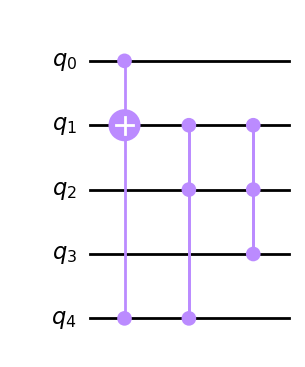

In [9]:
qc.draw('mpl')


In [6]:
qc.data

[CircuitInstruction(operation=Instruction(name='cz', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 4), Qubit(QuantumRegister(5, 'q'), 3)), clbits=()), CircuitInstruction(operation=Instruction(name='cz', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 4), Qubit(QuantumRegister(5, 'q'), 1)), clbits=()), CircuitInstruction(operation=Instruction(name='iswap', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2)), clbits=())]

<ipython-input-16-749a41f8e47c>:6: DeprecationWarning: 'Bit.index' is deprecated since Qiskit Terra 0.17 and will be removed in a future release. Bits may be in more than one register. Use 'QuantumCircuit.find_bit' to find all the containing registers within a circuit, and the index of the bit within the circuit.
  q1 = qc.data[j].qubits[0].index
<ipython-input-16-749a41f8e47c>:7: DeprecationWarning: 'Bit.index' is deprecated since Qiskit Terra 0.17 and will be removed in a future release. Bits may be in more than one register. Use 'QuantumCircuit.find_bit' to find all the containing registers within a circuit, and the index of the bit within the circuit.
  q2 = qc.data[j].qubits[1].index
<ipython-input-16-749a41f8e47c>:8: DeprecationWarning: 'Bit.index' is deprecated since Qiskit Terra 0.17 and will be removed in a future release. Bits may be in more than one register. Use 'QuantumCircuit.find_bit' to find all the containing registers within a circuit, and the index of the bit within 

toffoli 4 0 1
ccz 2 1 4
ccz 1 2 3


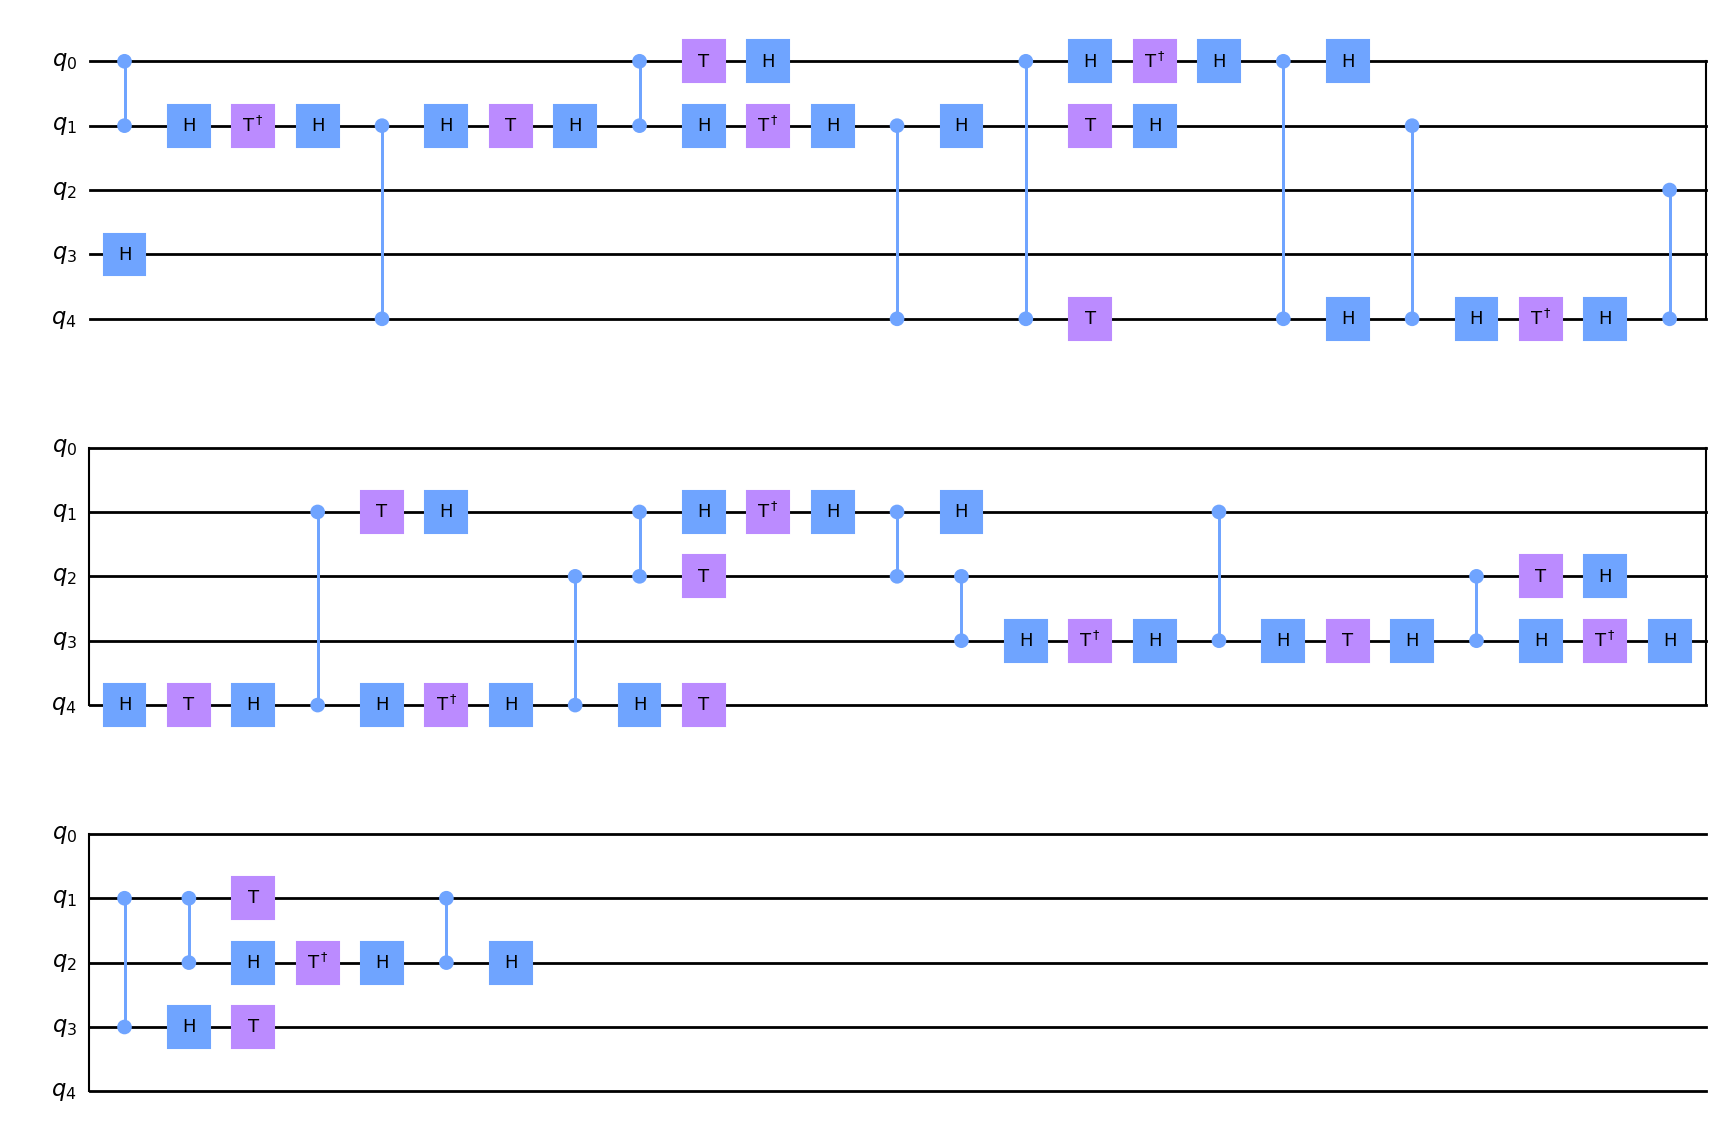

In [16]:
j = 0
decomp_circ = QuantumCircuit(amount_of_qubits)
for i in qc.data:
  #print (i[0].name)
  if i[0].name == 'ccx' or i[0].name == 'toffoli':
    q1 = qc.data[j].qubits[0].index
    q2 = qc.data[j].qubits[1].index
    q3 = qc.data[j].qubits[2].index
    print('toffoli', q1,q2,q3)

    decomp_circ.cz(q2,q3)
    decomp_circ.h(q3)
    decomp_circ.tdg(q3)
    decomp_circ.h(q3)
    decomp_circ.cz(q1,q3)
    decomp_circ.h(q3)
    decomp_circ.t(q3)
    decomp_circ.h(q3)
    decomp_circ.cz(q2,q3)
    decomp_circ.h(q3)
    decomp_circ.tdg(q3)
    decomp_circ.h(q3)
    decomp_circ.cz(q1,q3)
    decomp_circ.h(q3)
    decomp_circ.t(q3)
    decomp_circ.t(q2)
    decomp_circ.h(q3)
    decomp_circ.h(q2)
    decomp_circ.cz(q1,q2)
    decomp_circ.h(q2)
    decomp_circ.tdg(q2)
    decomp_circ.t(q1)
    decomp_circ.h(q2)
    decomp_circ.cz(q1,q2)
    decomp_circ.h(q2)

  if i[0].name == 'ccz':

    q1 = qc.data[j].qubits[0].index
    q2 = qc.data[j].qubits[1].index
    q3 = qc.data[j].qubits[2].index
    print('ccz', q1,q2,q3)

    decomp_circ.h(q3)
    decomp_circ.cz(q2,q3)
    decomp_circ.h(q3)
    decomp_circ.tdg(q3)
    decomp_circ.h(q3)
    decomp_circ.cz(q1,q3)
    decomp_circ.h(q3)
    decomp_circ.t(q3)
    decomp_circ.h(q3)
    decomp_circ.cz(q2,q3)
    decomp_circ.h(q3)
    decomp_circ.tdg(q3)
    decomp_circ.h(q3)
    decomp_circ.cz(q1,q3)
    decomp_circ.h(q3)
    decomp_circ.t(q3)
    decomp_circ.t(q2)
    
    decomp_circ.h(q2)
    decomp_circ.cz(q1,q2)
    decomp_circ.h(q2)
    decomp_circ.tdg(q2)
    decomp_circ.t(q1)
    decomp_circ.h(q2)
    decomp_circ.cz(q1,q2)
    decomp_circ.h(q2)
  
  
  decomp_circ.barrier
  j+=1
decomp_circ.draw('mpl')